<a href="https://colab.research.google.com/github/lochuynhk/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Loc_Huynh_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [22]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# The mean
def mean(sales):
  return (sum(sales)) / max(len(sales), 1)

mean(sales)

3052.714285714286

In [0]:
# The variance

m = sum(sales) / len(sales)
def var(sales):
  return sum((m - xi)**2 for xi in sales) / (len(sales)-1)
var = var(sales)


In [0]:
import numpy as np

In [33]:
print('Sample', np.var(sales, ddof=1))
print('Population', np.var(sales, ddof=0))

Sample 214387.90476190473
Population 183761.06122448976


In [37]:
# The Standard Deviation 
print('Sample', np.std(sales, ddof=1))
print('Population', np.std(sales, ddof=0))

Sample 463.0204150595357
Population 428.67360686714756


In [46]:
import math


std_sales = math.sqrt(var)
std_sales

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [51]:
cus = np.array([127, 80, 105, 92, 120, 115, 93])
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
# Finding the covariance

print(np.cov(cus, sales))

[[   290.95238095   7604.35714286]
 [  7604.35714286 214387.9047619 ]]


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [52]:
print('Std customers', np.std(cus, ddof=1))

Std customers 17.057326313123664


In [54]:
print('Std Sales', np.std(sales, ddof=1))

Std Sales 463.0204150595357


In [57]:
std_cus = np.std(cus, ddof=1)
std_sales = np.std(sales, ddof=1)
# correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))
r = np.cov(cus, sales) / (std_cus * std_sales)
r

array([[ 0.03683925,  0.96283398],
       [ 0.96283398, 27.14495851]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [60]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [62]:
df.drop('Unnamed: 0', axis=1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [68]:
stats = pd.DataFrame()
stats_mean = df.mean()
stats_mean

Unnamed: 0          655.500000
pclass                2.294882
survived              0.381971
age                  29.881135
sibsp                 0.498854
parch                 0.385027
fare                 33.295479
body                160.809917
has_cabin_number      0.225191
dtype: float64

In [69]:
stats_std = df.std()
stats_std

Unnamed: 0          378.308736
pclass                0.837836
survived              0.486055
age                  12.878277
sibsp                 1.041658
parch                 0.865560
fare                 51.758668
body                 97.696922
has_cabin_number      0.417867
dtype: float64

In [70]:
# Calculate variance of numeric columns
stat_var = df.var()
stat_var

Unnamed: 0          143117.500000
pclass                   0.701969
survived                 0.236250
age                    165.850021
sibsp                    1.085052
parch                    0.749195
fare                  2678.959738
body                  9544.688567
has_cabin_number         0.174613
dtype: float64

In [71]:
# Find the covariance of numeric columns
print(df.cov())

                     Unnamed: 0      pclass  ...         body  has_cabin_number
Unnamed: 0        143117.500000  284.357034  ...   591.579132        -95.438885
pclass               284.357034    0.701969  ...    -2.876653         -0.249992
survived             -53.967125   -0.127248  ...     0.000000          0.061406
age                -1442.939812   -3.954605  ...    81.622922          1.463138
sibsp                 25.828746    0.053090  ...    -8.708471         -0.003946
parch                  1.172783    0.013287  ...     4.237190          0.013316
fare               -9410.735123  -24.227788  ...  -179.164684         10.976961
body                 591.579132   -2.876653  ...  9544.688567          3.625689
has_cabin_number     -95.438885   -0.249992  ...     3.625689          0.174613

[9 rows x 9 columns]


In [76]:
# Find the correlation
corr = df.corr(method='pearson')

corr

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

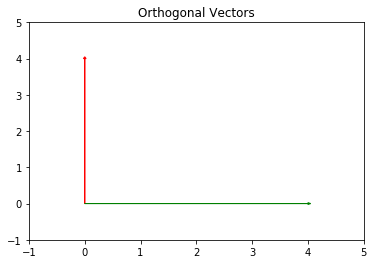

In [82]:
import matplotlib.pyplot as plt
vector1 = [0, 4]
vector2 = [4, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector1[0], vector1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector2[0], vector2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

- A synonym for orthogonal is perpendicularity. 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

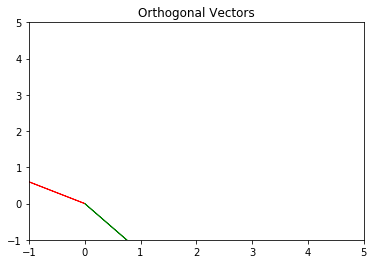

In [84]:
a = [-5, 3, 7]
b = [6, -8, 2]

# Plot the Scaled Vectors
plt.arrow(0,0, a[0], a[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, b[0], b[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.title("Orthogonal Vectors")
plt.show()

- The following vectors are not orthogonal because they are not perpendicular. 

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [86]:
from numpy import linalg as LA

# Find the norm square 
c = np.array([2, -15, 6, 20])

np.linalg.norm(c)


25.787593916455254

In [87]:
# Find c dot c
(c * c).sum()

665

In [88]:
# Find c multiply its transpose 
np.dot(c, c.T)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [93]:
f = ([4, 12, 11, 9, 2])

np.square(f)



array([ 16, 144, 121,  81,   4])

In [94]:
f_sqr = np.square(f)
np.sqrt(f_sqr)

array([ 4., 12., 11.,  9.,  2.])

In [95]:
norm_f = np.sqrt(f_sqr)
f_uv = 1 / norm_f
f_uv

array([0.25      , 0.08333333, 0.09090909, 0.11111111, 0.5       ])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

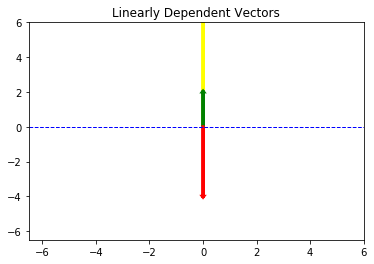

In [97]:
# Plot Linearly dependent vectors

# Axis Bounds
plt.xlim(-6.5, 6)
plt.ylim(-6.5, 6)

# Original Vector
v = [0, 2]
# Scaled Vectors
v2 = np.multiply(v, 4)
v3 = np.multiply(v, -2)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

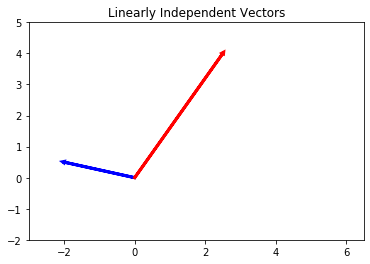

In [98]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-3,6.5)          
plt.ylim(-2,5)

# Original Vector
a = [-2,.5] 
b = [2.5, 4]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = [1, 2]
h = [4, 8]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

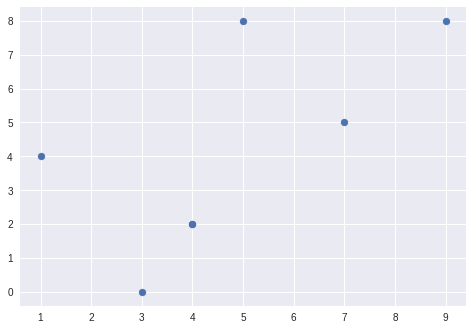

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()